## Import libraries

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

### Import datasets

In [12]:
labels = pd.read_csv('Credit_card_label.csv')
X = pd.read_csv('Credit_card.csv')

In [13]:
labels.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [14]:
X.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [16]:
data = pd.merge(X, labels, on='Ind_ID', how='inner')

In [17]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1


### Data preproccessing

In [18]:
def percentage_ratio(data):
    datatype = pd.DataFrame(data.dtypes,columns=["Data Type"])
    datatype["Missing Values"]=data.isnull().sum()
    datatype["% Missing Values"]=data.isnull().sum()/len(data)*100
    return datatype.sort_values(by="% Missing Values", ascending=False)
percentage_ratio(data)

,Data Type,Missing Values,% Missing Values
Type_Occupation,object,488,31.52
Annual_income,float64,23,1.49
Birthday_count,float64,22,1.42
GENDER,object,7,0.45
Ind_ID,int64,0,0.00
Employed_days,int64,0,0.00
Family_Members,int64,0,0.00
EMAIL_ID,int64,0,0.00
Phone,int64,0,0.00
Work_Phone,int64,0,0.00


In [19]:
data = data.drop(['Ind_ID', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation'], axis=1)

In [20]:
print(f"duplicates before : {data.duplicated().sum()}")
data = data.drop_duplicates().reset_index().drop('index',axis=1)
print(f"duplicates after : {data.duplicated().sum()}")

duplicates before : 162
duplicates after : 0


In [21]:
data.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,label
0,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,2,1
1,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,2,1
2,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,2,1
4,NaN,Y,N,0,315000.00,Pensioner,Higher education,Married,House / apartment,-13557.00,-586,2,1


### Visualization

In [22]:
ObjectCol = list((set(data.columns)-set(data.describe().columns)))
for x in ObjectCol:
    print(x)
    print(data[x].unique())
    print('============')

Car_Owner
['Y' 'N']
Propert_Owner
['Y' 'N']
Marital_status
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Housing_type
['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
GENDER
['M' 'F' nan]
Type_Income
['Pensioner' 'Commercial associate' 'Working' 'State servant']
EDUCATION
['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']


In [23]:
def drawBoxPlot(df,rows,cols):
  count=0
  indx = df.describe().columns.tolist()
  lenn = len(df.describe().columns.tolist())
  iter = int(len(df.describe().columns.tolist()))/cols if len(df.describe().columns.tolist())%cols==0 else (int(len(df.describe().columns.tolist())/cols))+1
  fig, ax = plt.subplots(rows, cols, figsize=(20, 5))
  fig.tight_layout(pad=2.0)
  for i in range(rows):
    for j in range(cols):
      sns.boxplot(data=df[[indx[count]]],ax=ax[i,j],orient="h")
      ax[i,j].set_title(indx[count])
      ax[i,j].set(yticks=[0])
      count+=1
      if count == lenn:
        break

<Axes: >

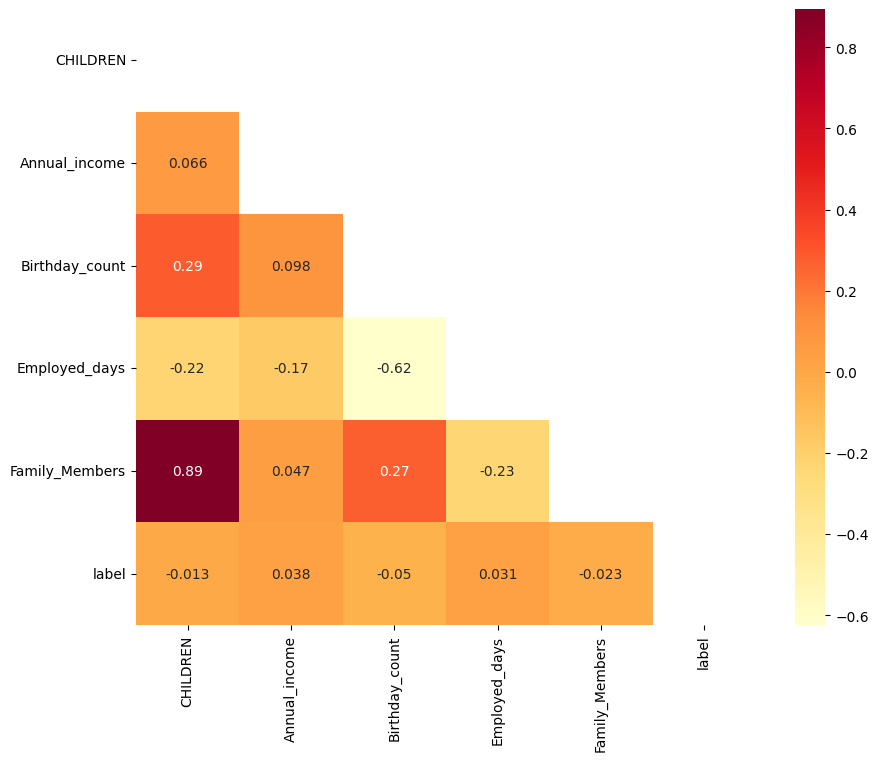

In [24]:
plt.figure(figsize=(10,8))
corr= data[data.describe().columns].corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix,cmap ="YlOrRd")

None


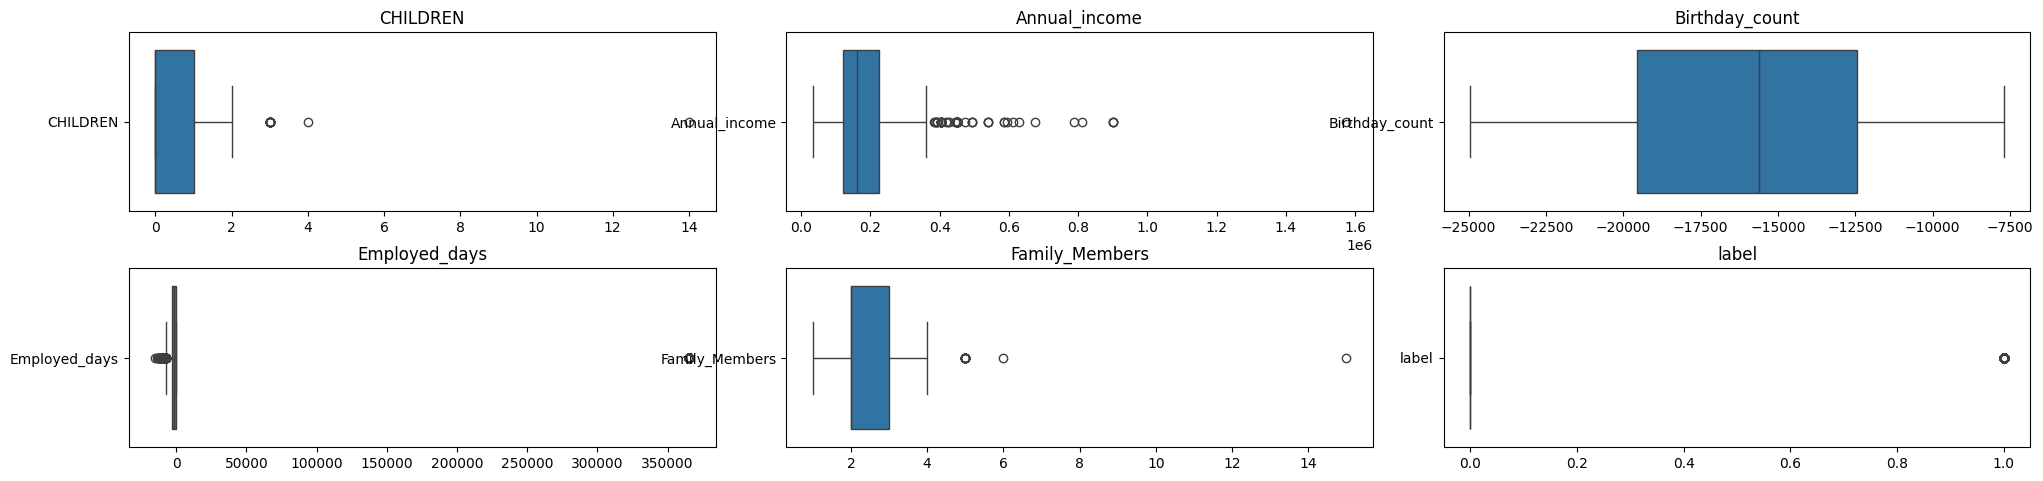

In [25]:
print(drawBoxPlot(data, 2,3))

In [27]:
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            mode = df[column].mode()
            if not mode.empty:
                df[column].fillna(mode[0], inplace=True)
        else:
            median = df[column].median()
            df[column].fillna(median, inplace=True)

fill_missing_values(data)

In [35]:
cats = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type']

label_encoder = preprocessing.LabelEncoder() 

for cat in cats:
    label_encoder = preprocessing.LabelEncoder() 
    data[cat] = label_encoder.fit_transform(data[cat].astype(str))


In [36]:
data.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,label
0,1,1,1,0,180000.00,1,1,1,1,-18772.00,365243,2,1
1,0,1,0,0,315000.00,0,1,1,1,-13557.00,-586,2,1
2,0,1,0,0,315000.00,0,1,1,1,-15611.50,-586,2,1
3,0,1,0,0,162000.00,0,1,1,1,-13557.00,-586,2,1
4,0,1,0,0,315000.00,1,1,1,1,-13557.00,-586,2,1


<Axes: xlabel='label'>

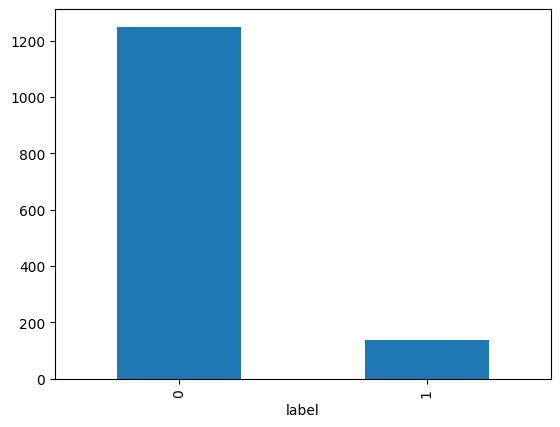

In [37]:
data['label'].value_counts().plot(kind='bar')

# Training

In [38]:
X = data.drop('label',axis=1)
y= data['label']

In [40]:
from imblearn.over_sampling import RandomOverSampler

X_over, y_over = RandomOverSampler().fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_over, y_over, test_size=0.3)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [44]:
from IPython.display import clear_output


clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=3,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_val , y_train , y_val)
clear_output()

In [51]:
models.sort_values(by="F1 Score",ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.99,0.99,0.99,0.99,0.41
RandomForestClassifier,0.98,0.98,0.98,0.98,0.51
BaggingClassifier,0.97,0.96,0.96,0.97,0.13
XGBClassifier,0.96,0.96,0.96,0.96,0.29
LGBMClassifier,0.95,0.95,0.95,0.95,0.67
DecisionTreeClassifier,0.94,0.94,0.94,0.94,0.03
ExtraTreeClassifier,0.93,0.93,0.93,0.93,0.02
LabelPropagation,0.90,0.90,0.90,0.90,0.23
LabelSpreading,0.90,0.90,0.90,0.90,0.30


## Best Classifier

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

rf_classifier = ExtraTreesClassifier()

param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=kf, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_

In [65]:
y_pred = best_estimator.predict(X_val)

### Cinfusion Matrix

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       367
           1       0.97      1.00      0.99       383

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

Best Estimator: ExtraTreesClassifier(max_features='log2')
Best Params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.9789495787498621


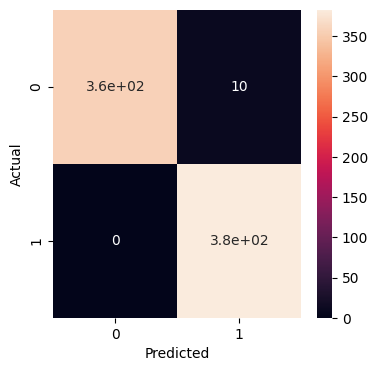

In [67]:
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_val,y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_val,y_pred))
print("Best Estimator:", grid_search.best_estimator_)
print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
#print("Test F1 Score:", f1_score(y_val, y_pred))

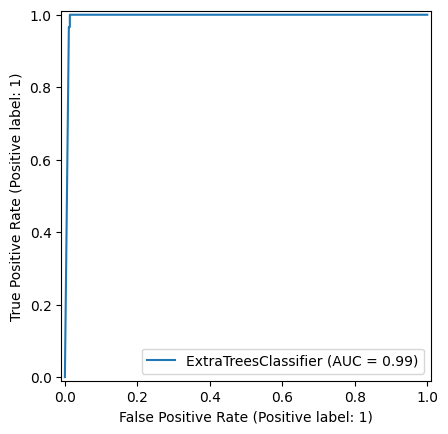

In [71]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_estimator, X_val, y_val)

## The End